In [100]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Importing image and Color Space conversion ###
Limg = cv.cvtColor(cv.imread("../DATA/dog_backpack.jpg"), cv.COLOR_BGR2RGB)

### Importing image and resizing it 
Simg = cv.resize(cv.cvtColor(cv.imread("../DATA/watermark_no_copy.png"), cv.COLOR_BGR2RGB), (600, 650))

### Changing into gray color space ###
SimgGray = cv.cvtColor(Simg, cv.COLOR_RGB2GRAY)

### Creating mask ###
SimgGrayMask = cv.bitwise_not(SimgGray)

### Creating 3 Channel background for diamension change ###
whiteBG = np.full(Simg.shape, 255, dtype=np.uint8)

### Over lapping mask on whiteBD ###
newMask = cv.bitwise_or(whiteBG, whiteBG, mask= SimgGrayMask)

### Appling mask on Small Image ###
SimgMasked = cv.bitwise_and(Simg, newMask)


### Selecting Region of Intrest ###
y_start = Limg.shape[0] - Simg.shape[0]
y_end = Limg.shape[0]
x_start = Limg.shape[1] - Simg.shape[1]
x_end = Limg.shape[1]


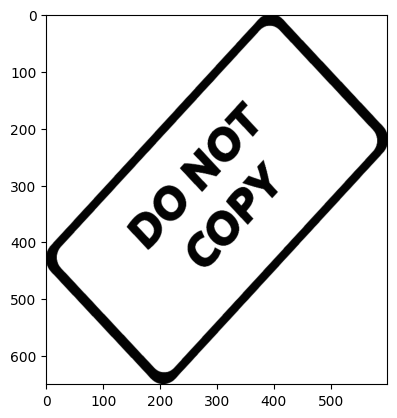

In [109]:
plt.imshow(SimgGray, cmap='gray')

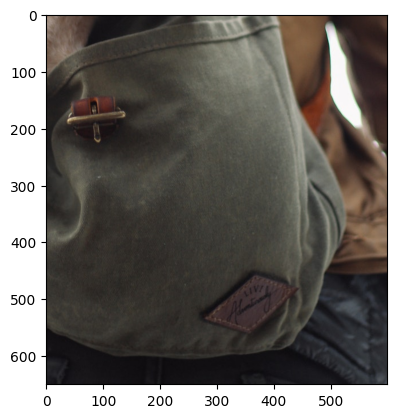

In [101]:

### Creating Region of intrest ###
ROI = Limg[y_start:y_end, x_start:x_end] 

plt.imshow(ROI)

In [ ]:
### Overlapping ROI and Small image processed
SimgFinal = cv.bitwise_or(ROI, SimgMasked) 

### Appling small image proccessed into large image ###
Limg[y_start:y_end, x_start:x_end] = SimgFinal

plt.imshow(Limg)

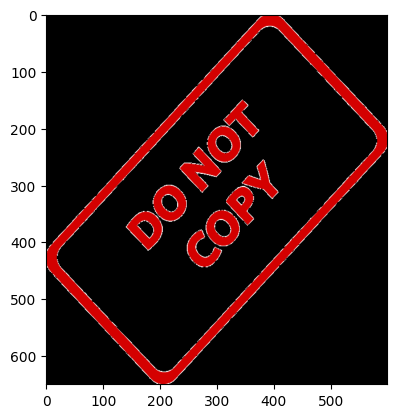

In [88]:
plt.imshow(SimgMasked)

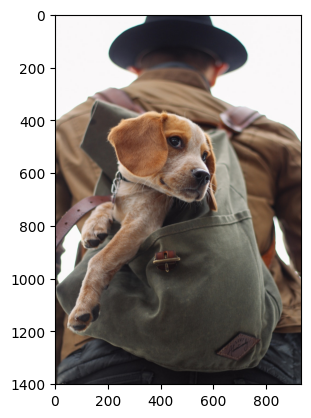

In [71]:
plt.imshow(Limg)

In [73]:
print(Limg.shape, Simg.shape)

(1401, 934, 3) (650, 600, 3)


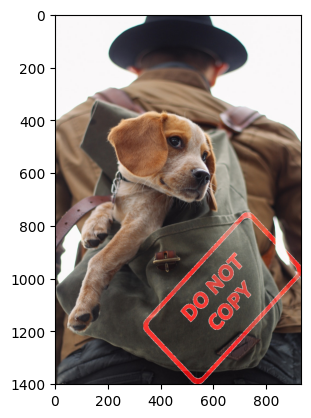